# Exploratory Data Analysis – Climate patterns 2022

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import zscore

## Load raw dataset

In [2]:
weather_df = pd.read_csv("data/raw/weather_2022_raw.csv")
weather_df.head()

weather_df["time"] = pd.to_datetime(weather_df["time"])

## Dataset overview and quality check

In [3]:
weather_df.info()

missing_values = weather_df.isna().sum()
missing_percent = (weather_df.isna().mean() * 100).round(2)

missing_df = pd.DataFrame({
    'missing_count': missing_values,
    'missing_percent': missing_percent
})

missing_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7300 entries, 0 to 7299
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   time                7300 non-null   datetime64[ns]
 1   temperature_2m_max  7300 non-null   float64       
 2   temperature_2m_min  7300 non-null   float64       
 3   precipitation_sum   7300 non-null   float64       
 4   city                7300 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 285.3+ KB


,missing_count,missing_percent
time,0,0.0
temperature_2m_max,0,0.0
temperature_2m_min,0,0.0
precipitation_sum,0,0.0
city,0,0.0


## Distributions – Univariate analysis

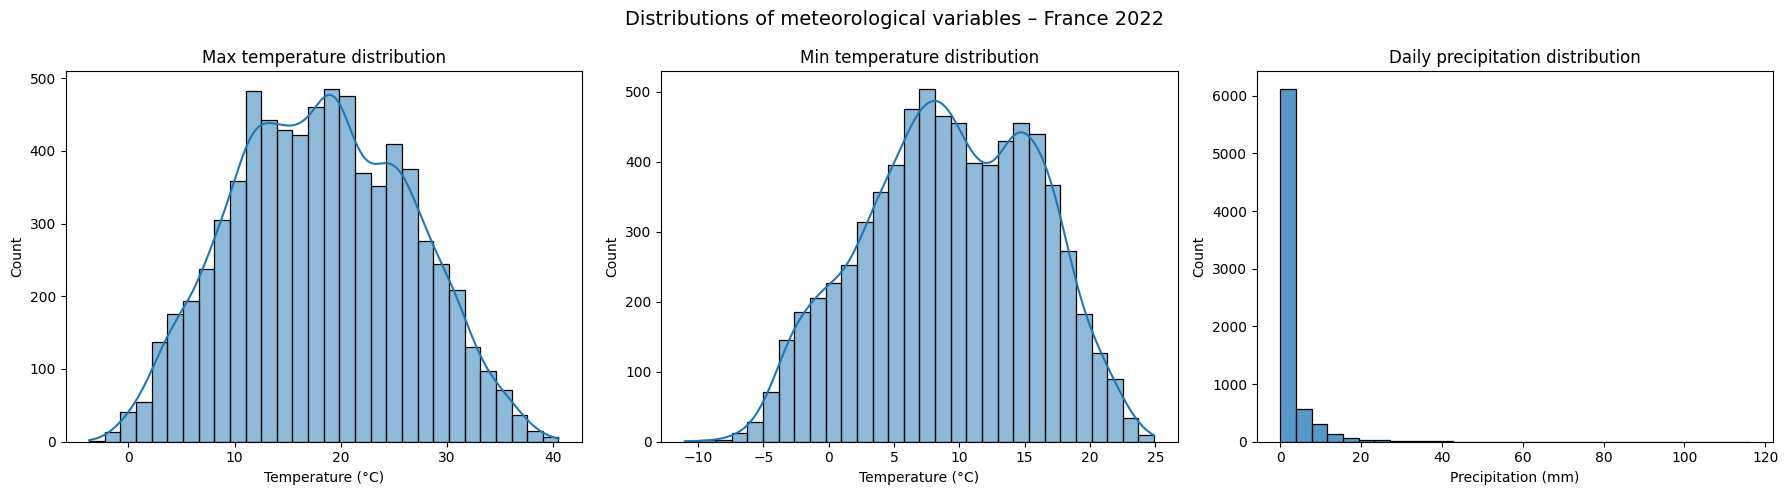

In [4]:
# Create output directory for figures
os.makedirs("outputs/figures", exist_ok=True)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(weather_df['temperature_2m_max'], kde=True, bins=30, ax=axes[0])
axes[0].set_title("Max temperature distribution")
axes[0].set_xlabel("Temperature (°C)")

sns.histplot(weather_df['temperature_2m_min'], kde=True, bins=30, ax=axes[1])
axes[1].set_title("Min temperature distribution")
axes[1].set_xlabel("Temperature (°C)")

sns.histplot(weather_df['precipitation_sum'], kde=False, bins=30, ax=axes[2])
axes[2].set_title("Daily precipitation distribution")
axes[2].set_xlabel("Precipitation (mm)")

plt.suptitle("Distributions of meteorological variables – France 2022", fontsize=14)
plt.tight_layout()
plt.savefig("outputs/figures/distributions_overview.png", dpi=150, bbox_inches="tight")
plt.show()
plt.close()

## Temporal analysis – Global evolution (ALL CITIES)

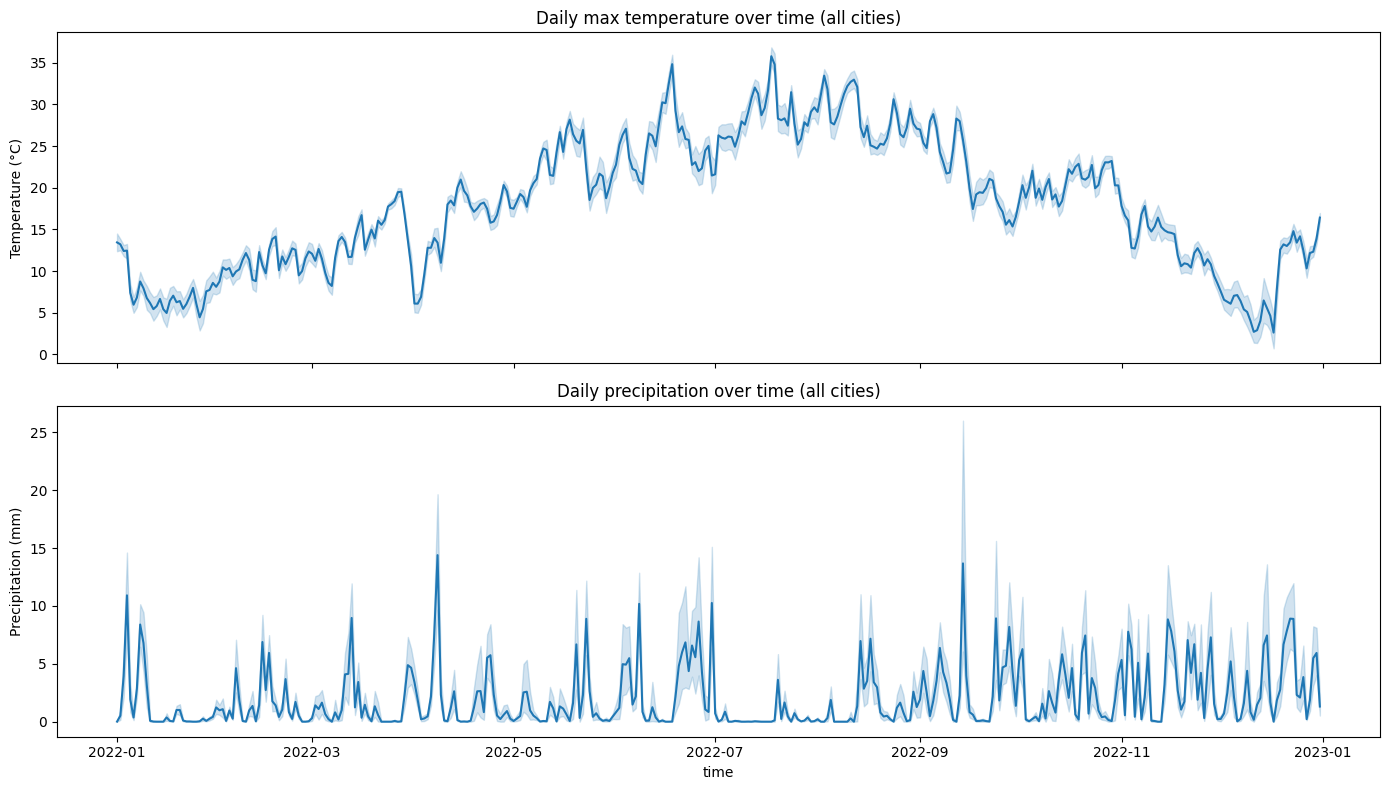

In [5]:
weather_df_sorted = weather_df.sort_values("time")

fig, axes = plt.subplots(2, 1, figsize=(14, 8), sharex=True)

sns.lineplot(data=weather_df_sorted, x="time", y="temperature_2m_max", ax=axes[0])
axes[0].set_title("Daily max temperature over time (all cities)")
axes[0].set_ylabel("Temperature (°C)")

sns.lineplot(data=weather_df_sorted, x="time", y="precipitation_sum", ax=axes[1])
axes[1].set_title("Daily precipitation over time (all cities)")
axes[1].set_ylabel("Precipitation (mm)")

plt.tight_layout()
plt.savefig("outputs/figures/global_time_series.png", dpi=150, bbox_inches="tight")
plt.show()
plt.close()



## Monthly seasonality – Global

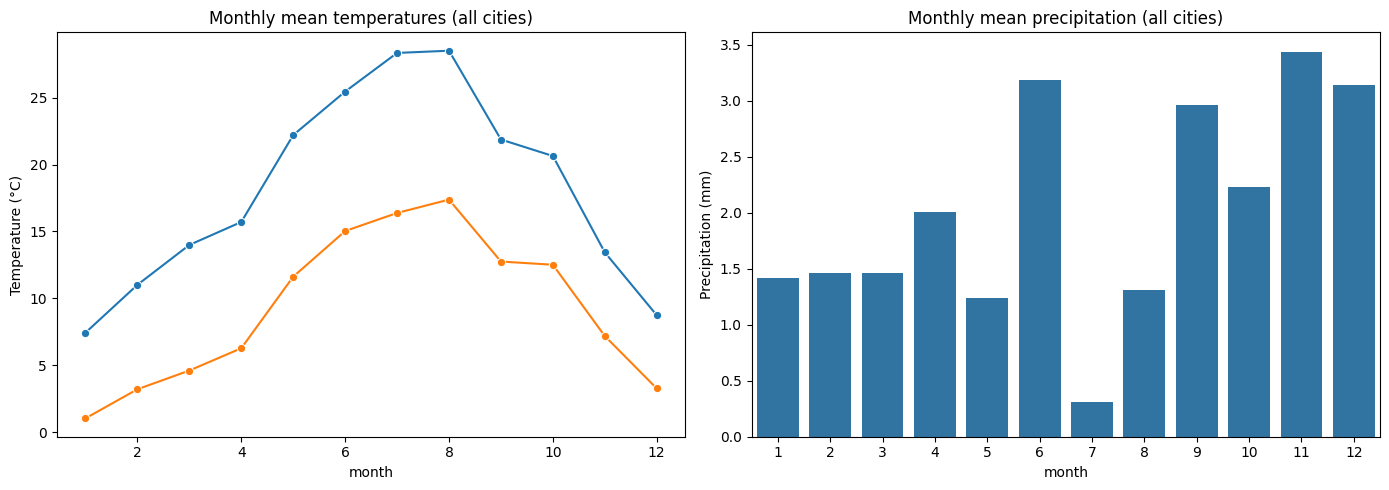

In [6]:
weather_df["month"] = weather_df["time"].dt.month

monthly_mean = weather_df.groupby("month")[[
    "temperature_2m_max",
    "temperature_2m_min",
    "precipitation_sum"
]].mean().reset_index()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.lineplot(data=monthly_mean, x="month", y="temperature_2m_max", marker="o", ax=axes[0])
sns.lineplot(data=monthly_mean, x="month", y="temperature_2m_min", marker="o", ax=axes[0])
axes[0].set_title("Monthly mean temperatures (all cities)")
axes[0].set_ylabel("Temperature (°C)")

sns.barplot(data=monthly_mean, x="month", y="precipitation_sum", ax=axes[1])
axes[1].set_title("Monthly mean precipitation (all cities)")
axes[1].set_ylabel("Precipitation (mm)")

plt.tight_layout()
plt.savefig("outputs/figures/monthly_seasonality.png", dpi=150, bbox_inches="tight")
plt.show()
plt.close()

## Spatial analysis – Cities

In [7]:
city_stats = weather_df.groupby('city')[[
    'temperature_2m_max',
    'temperature_2m_min',
    'precipitation_sum'
]].mean().reset_index()

city_stats

,city,temperature_2m_max,temperature_2m_min,precipitation_sum
0,Ajaccio,22.266575,12.364384,2.475068
1,Besançon,16.916164,8.355342,2.917260
2,Bordeaux,20.110959,10.640548,2.271781
3,Clermont-Ferrand,17.526575,8.064658,2.135068
4,Dijon,16.737260,8.135616,1.989589
5,Lille,16.183014,7.934795,1.858082
6,Limoges,17.992329,8.333151,2.255616
7,Lyon,18.547123,9.159452,1.986027
8,Marseille,19.896164,12.967671,1.152877
9,Metz,16.167123,7.630137,1.843288


## Distribution by city

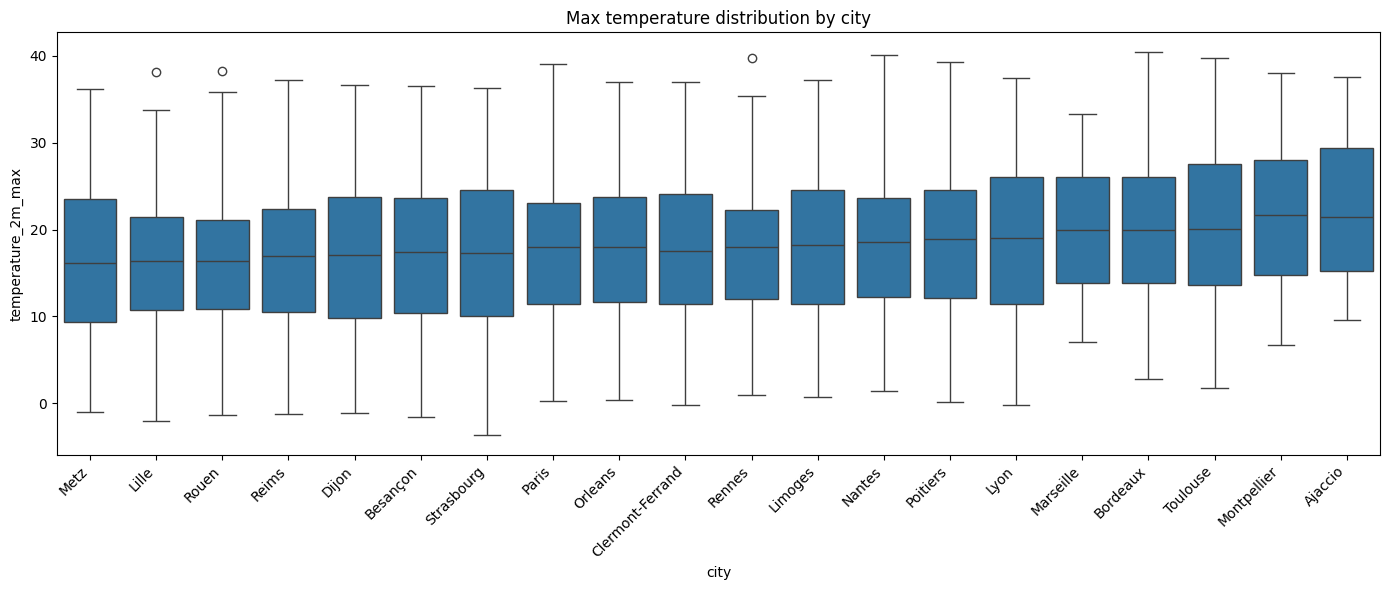

In [8]:
plt.figure(figsize=(14, 6))
order = city_stats.sort_values("temperature_2m_max")["city"]
sns.boxplot(data=weather_df, x="city", y="temperature_2m_max", order=order)
plt.xticks(rotation=45, ha="right")
plt.title("Max temperature distribution by city")
plt.tight_layout()
plt.savefig("outputs/figures/boxplot_temp_max_city.png", dpi=150, bbox_inches="tight")
plt.show()
plt.close()

## Monthly evolution by city

In [9]:
monthly_city = weather_df.groupby(["city", "month"])[
    ["temperature_2m_max", "temperature_2m_min", "precipitation_sum"]
].mean().reset_index()

monthly_city.head()

,city,month,temperature_2m_max,temperature_2m_min,precipitation_sum
0,Ajaccio,1,12.845161,4.267742,1.235484
1,Ajaccio,2,14.789286,4.500000,1.267857
2,Ajaccio,3,15.493548,5.629032,1.380645
3,Ajaccio,4,17.856667,7.053333,3.160000
4,Ajaccio,5,24.816129,13.951613,1.651613


## Correlation matrix

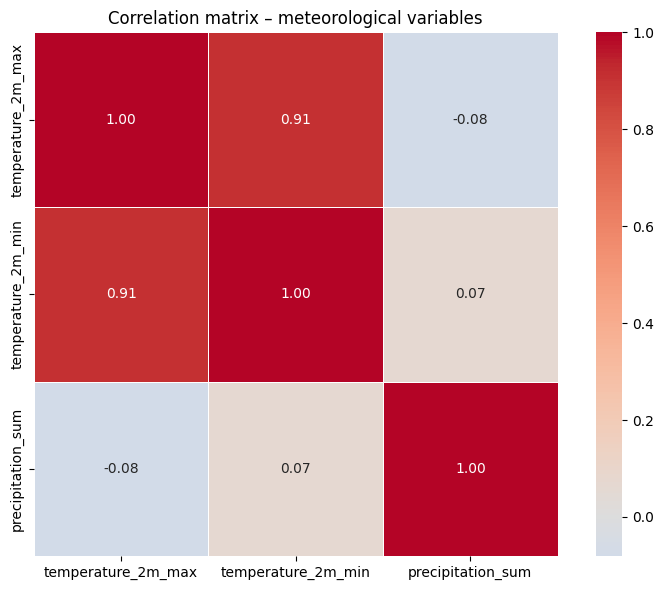

In [10]:
corr_matrix = weather_df[[
    "temperature_2m_max",
    "temperature_2m_min",
    "precipitation_sum"
]].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    square=True,
    linewidths=0.5
)
plt.title("Correlation matrix – meteorological variables")
plt.tight_layout()
plt.savefig("outputs/figures/correlation_matrix.png", dpi=150, bbox_inches="tight")
plt.show()
plt.close()

## Identification of meteorological extreme events

In [11]:
RAIN_THRESHOLD = 1.0
MODERATE_RAIN = 10.0
HEAVY_RAIN = 30.0
VERY_HEAVY_RAIN = 50.0

HOT_DAY = 25.0
VERY_HOT_DAY = 30.0
HEATWAVE_DAY = 35.0

TROPICAL_NIGHT = 20.0
FREEZING_DAY = 0.0
VERY_COLD_DAY = -5.0

# Rain categories
weather_df['rain_category'] = pd.cut(
    weather_df['precipitation_sum'],
    bins=[-0.1, 1, 10, 30, 50, weather_df['precipitation_sum'].max()],
    labels=[
        "Dry (<1 mm)",
        "Light rain (1-10 mm)",
        "Moderate rain (10-30 mm)",
        "Heavy rain (30-50 mm)",
        "Very heavy rain (>50 mm)"
    ]
)

# Hot categories
weather_df['hot_category'] = pd.cut(
    weather_df['temperature_2m_max'],
    bins=[-50, 25, 30, 35, 60],
    labels=[
        "Normal day (<25°C)",
        "Hot day (25-30°C)",
        "Very hot day (30-35°C)",
        "Heatwave day (>35°C)"
    ]
)

# Cold categories
weather_df['cold_category'] = pd.cut(
    weather_df['temperature_2m_min'],
    bins=[-50, -5, 0, 20, 60],
    labels=[
        "Very cold (<-5°C)",
        "Freezing (0°C)",
        "Normal night (0-20°C)",
        "Tropical night (>20°C)"
    ]
)

## Statistical anomaly detection

In [12]:
# Compute Z-scores for anomaly detection
weather_df['z_temp_max'] = weather_df.groupby('city')['temperature_2m_max'].transform(zscore)
weather_df['z_temp_min'] = weather_df.groupby('city')['temperature_2m_min'].transform(zscore)
weather_df['z_rain'] = weather_df.groupby('city')['precipitation_sum'].transform(zscore)


# Threshold for extreme events
ANOMALY_THRESHOLD = 2.0

# Flag anomalies
weather_df['temp_max_anomaly'] = weather_df['z_temp_max'].abs() > ANOMALY_THRESHOLD
weather_df['temp_min_anomaly'] = weather_df['z_temp_min'].abs() > ANOMALY_THRESHOLD
weather_df['rain_anomaly'] = weather_df['z_rain'].abs() > ANOMALY_THRESHOLD

## Save dataset for modeling

In [13]:
os.makedirs("data/processed", exist_ok=True)
weather_df.to_csv("data/processed/weather_2022_processed.csv", index=False)

print("Dataset saved to data/processed/weather_2022_processed.csv")

Dataset saved to data/processed/weather_2022_processed.csv
